Google Colab Try

In [ ]:
# let's install and import
!pip install rasterio
!pip install numpy
!pip install matplotlib
!pip install geocoder
!pip install pyproj
!pip install open3d

     |████████████████████████████████| 18.3MB 1.5MB/s 
     |████████████████████████████████| 102kB 2.1MB/s 
     |████████████████████████████████| 10.9MB 2.2MB/s 
     |████████████████████████████████| 99.4MB 55kB/s 


In [ ]:
import geocoder
import rasterio
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from rasterio.plot import show
from rasterio.mask import mask
from pyproj import Proj, transform
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
import open3d as o3d
# from IPython.display import Image
import matplotlib.image as mpimg 
import scipy.interpolate as sci







In [ ]:
# les DTM représentes les données au sol
# les DSM représentes les données au dessus du sol

dtm = rasterio.open('/content/drive/My Drive/DATASET/DTM/RELIEF_HAINAUT_MNT_2013_2014.tif')
dsm = rasterio.open('/content/drive/My Drive/DATASET/DSM/RELIEF_HAINAUT_MNS_2013_2014.tif')

In [ ]:
# Geocoding d'une adresse 
g = geocoder.osm('marcinelle')
print(g.json)

g = geocoder.osm('avenue de philippeville 159, 6001 marcinelle')
print(g.json)

coord = g.osm['x'],g.osm['y']
print(coord)


INFO - 2020-10-29 14:24:25,898 - base - Requested https://nominatim.openstreetmap.org/search?q=marcinelle&format=jsonv2&addressdetails=1&limit=1


{'accuracy': 0.4, 'address': 'Marcinelle, Charleroi, Hainaut, Wallonie, 6001, België - Belgique - Belgien', 'bbox': {'northeast': [50.4116325, 4.4623268], 'southwest': [50.3527894, 4.4168098]}, 'city': 'Charleroi', 'confidence': 6, 'country': 'België - Belgique - Belgien', 'country_code': 'be', 'county': 'Hainaut', 'district': 'Marcinelle', 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_boundary_administrative.p.20.png', 'importance': 0.4, 'lat': 50.38036945, 'lng': 4.439727567316614, 'ok': True, 'osm_id': 3411182, 'osm_type': 'relation', 'place_id': 235683908, 'place_rank': 18, 'postal': '6001', 'quality': 'administrative', 'raw': {'place_id': 235683908, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 3411182, 'boundingbox': ['50.3527894', '50.4116325', '4.4168098', '4.4623268'], 'lat': '50.38036945', 'lon': '4.439727567316614', 'display_name': 'Marcinelle, Charleroi, Hainaut, Wallonie, 6001, Belg

INFO - 2020-10-29 14:24:26,782 - base - Requested https://nominatim.openstreetmap.org/search?q=avenue+de+philippeville+159%2C+6001+marcinelle&format=jsonv2&addressdetails=1&limit=1


{'accuracy': 0.61, 'address': 'Avenue de Philippeville, Marcinelle, Charleroi, Hainaut, Wallonie, 6001, België - Belgique - Belgien', 'bbox': {'northeast': [50.4022047, 4.4524749], 'southwest': [50.4004051, 4.4507568]}, 'city': 'Charleroi', 'confidence': 10, 'country': 'België - Belgique - Belgien', 'country_code': 'be', 'county': 'Hainaut', 'district': 'Marcinelle', 'importance': 0.61, 'lat': 50.4009965, 'lng': 4.4520043, 'ok': True, 'osm_id': 267274129, 'osm_type': 'way', 'place_id': 151785283, 'place_rank': 26, 'postal': '6001', 'quality': 'residential', 'raw': {'place_id': 151785283, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 267274129, 'boundingbox': ['50.4004051', '50.4022047', '4.4507568', '4.4524749'], 'lat': '50.4009965', 'lon': '4.4520043', 'display_name': 'Avenue de Philippeville, Marcinelle, Charleroi, Hainaut, Wallonie, 6001, België - Belgique - Belgien', 'place_rank': 26, 'category': 'highway', 'type':

In [ ]:
# transformation des coordonées en lambert72

inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:31370')

x1,y1 = coord
x2,y2 = transform(inProj,outProj,x1,y1)

print(x2,y2)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axi

155919.14197459817 121125.08941813558


In [ ]:
# r = rayon
def square(x,y,r):
  geojson = [{'type': 'Polygon', 'coordinates': [[(x - r, y - r), (x + r, y - r), (x + r, y + r), (x - r, y + r)]]}]
  return geojson

geojson = square(x2,y2,20)
print(geojson)

[{'type': 'Polygon', 'coordinates': [[(155899.14197459817, 121105.08941813558), (155939.14197459817, 121105.08941813558), (155939.14197459817, 121145.08941813558), (155899.14197459817, 121145.08941813558)]]}]


In [ ]:
# raster = tiff, shape = geojson
# découpage du tiff selon un géojson pour pouvoir l'afficher par la suite

def crop_raster(raster, shape):
  """Crop the raster with a given shape (Polygon)"""

  print(f'shape :{shape}')

  # Crop the raster
  out_image, out_transform = rasterio.mask.mask(raster, shapes=shape, all_touched=True, crop=True)
  out_meta = raster.meta
  print(f'out meta :{out_meta}')
  out_image = np.moveaxis(out_image.squeeze(), -1, 0)

  # Up the resolution (here's * 2) of the cropped raster
  x_in=np.arange(0,41,1)
  y_in=np.arange(0,41,1)
  x_out= np.arange(0,41,0.5)
  y_out= np.arange(0,41,0.5)
  f = sci.RectBivariateSpline(x_in, y_in, out_image.squeeze())
  out_image = f(x_out, y_out)

  # Display the result
  plt.figure(figsize=(10, 14))
  plt.imshow(out_image)
  plt.colorbar(shrink=0.5)
  plt.show()

  # Update the new tiff file metadata
  out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[0],
                 "width": out_image.shape[1],
                 "transform": out_transform })
                 #'nodata': no_data})

  return out_image, out_meta

  # More info: https://gis.stackexchange.com/questions/337677/rasterio-write-masked-array-to-tiff-shape-write-and-read-indices-are-wrong

shape :[{'type': 'Polygon', 'coordinates': [[(155899.14197459817, 121105.08941813558), (155939.14197459817, 121105.08941813558), (155939.14197459817, 121145.08941813558), (155899.14197459817, 121145.08941813558)]]}]
out meta :{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 126000, 'height': 98000, 'count': 1, 'crs': CRS.from_epsg(31370), 'transform': Affine(1.0, 0.0, 42000.0,
       0.0, -1.0, 167999.99999999927)}


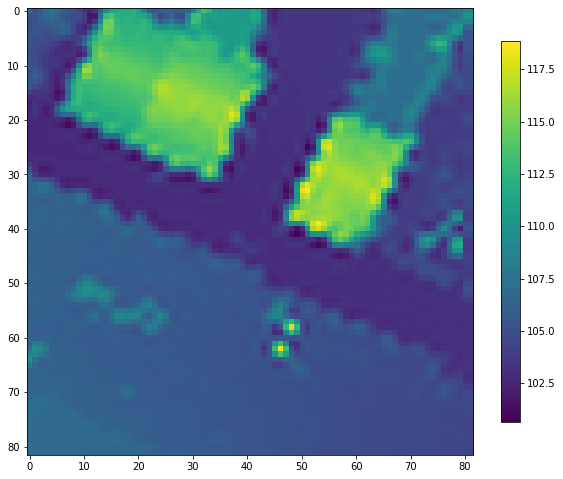

In [ ]:
result = crop_raster(dsm,geojson)


shape :[{'type': 'Polygon', 'coordinates': [[(155899.14197459817, 121105.08941813558), (155939.14197459817, 121105.08941813558), (155939.14197459817, 121145.08941813558), (155899.14197459817, 121145.08941813558)]]}]
out meta :{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 126000, 'height': 98000, 'count': 1, 'crs': CRS.from_epsg(31370), 'transform': Affine(1.0, 0.0, 42000.0,
       0.0, -1.0, 167999.99999999927)}


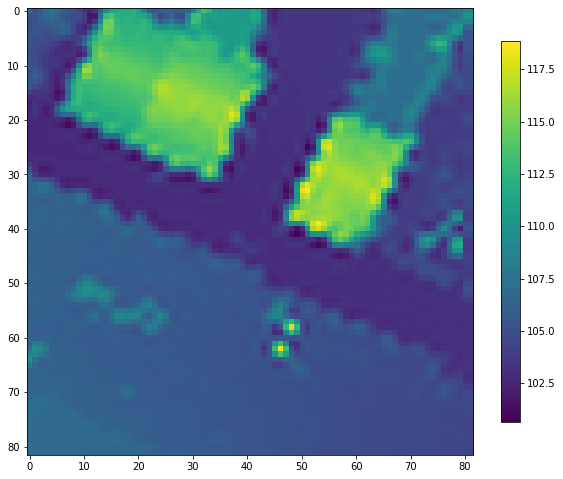

100.6533656098997
118.82972646524748


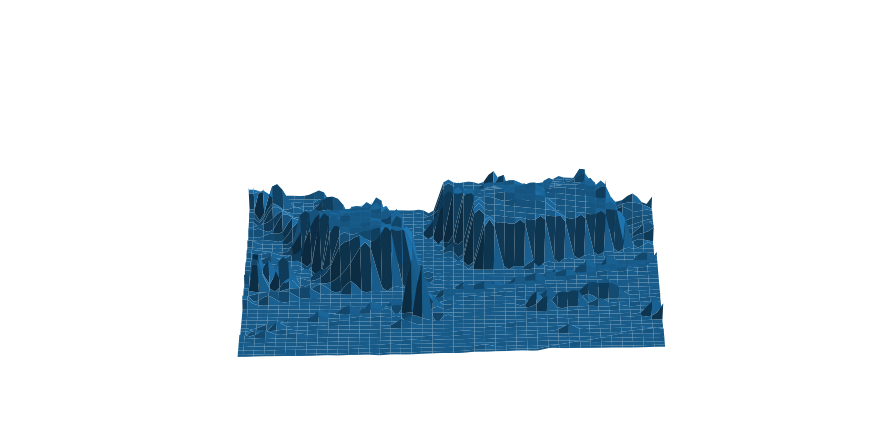

ax.azim 90
ax.elev 45


In [ ]:
elevation_mask = crop_raster(dsm, geojson)[0]

z = elevation_mask
x, y = np.meshgrid(np.arange(z.shape[0]), np.arange(z.shape[1]))

print(z.min())
print(z.max())

fig = plt.figure(figsize=(12, 6))

# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_axes((0,0,1,1),projection='3d')

ax.set_zlim(100, 140)

ax.azim = 90
ax.elev = 45

# Set whitespace to 0
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

# Turn off axes and set axes limits
# ax.axis('tight')
ax.axis('off')


ax.plot_surface(x, y, z)

# save without padding
plt.savefig("fig.png", bbox_inches='tight', pad_inches=-2)

plt.show()
# plt.close()

print('ax.azim {}'.format(ax.azim))
print('ax.elev {}'.format(ax.elev))

[image](content/fig.png)

shape :[{'type': 'Polygon', 'coordinates': [[(155899.14197459817, 121105.08941813558), (155939.14197459817, 121105.08941813558), (155939.14197459817, 121145.08941813558), (155899.14197459817, 121145.08941813558)]]}]
out meta :{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 126000, 'height': 98000, 'count': 1, 'crs': CRS.from_epsg(31370), 'transform': Affine(1.0, 0.0, 42000.0,
       0.0, -1.0, 167999.99999999927)}


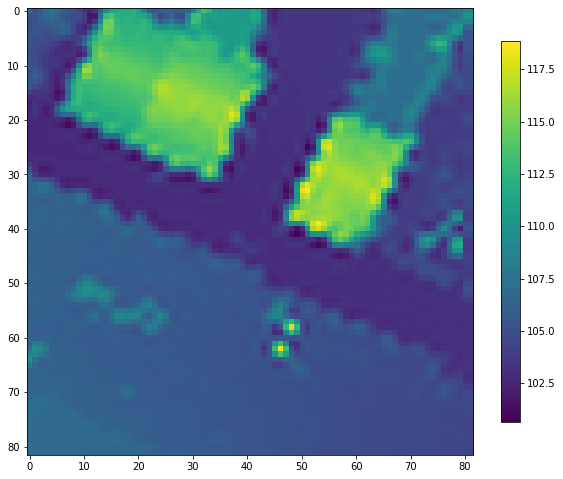

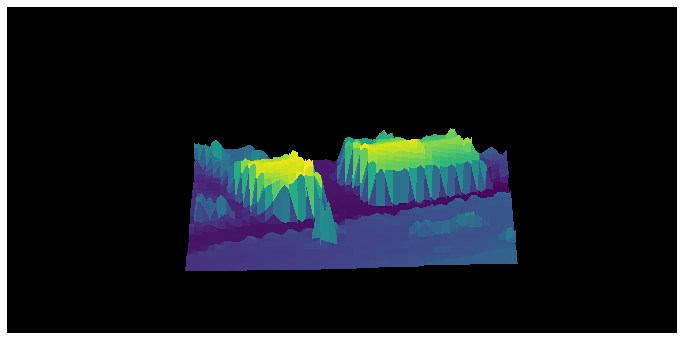

ax.azim 90
ax.elev 45


In [ ]:
elevation_mask = crop_raster(dsm, geojson)[0]
Z = elevation_mask
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

m, n = Z.shape
X, Y = np.meshgrid(np.arange(n), np.arange(m))
plt.ion()
ax.set_zlim(100, 140)
ax.plot_surface(X, Y, Z, cmap=cm.viridis, antialiased=False)
ax.axis("off")
ax.set_facecolor('black')
ax.azim = 90
ax.elev = 45

plt.show()


print('ax.azim {}'.format(ax.azim))
print('ax.elev {}'.format(ax.elev))

In [ ]:
# class de function qui prend un tiff et retourne un dataframe avec x,y,z

class Raster2xyz(object):

    def __init__(self, verbose=True):
        pass

    def __geotrCoords(self, gtr, x, y):
        try:
            # gtr_x = gtr[0] + (x) * gtr[1] + (y) * gtr[2]
            # gtr_y = gtr[3] + (x) * gtr[4] + (y) * gtr[5]

            gtr_x = x
            gtr_y = y

            return (gtr_x, gtr_y)

        except Exception as err:
            self.__logger.error("Error getting geotransformed coordinates: {0}".format(err))

    def __getXyzData(self, raster_values, no_data):

        try:
            y, x = np.where(raster_values != no_data)
            data_vals = np.extract(raster_values != no_data, raster_values)

            return (x, y, data_vals)

        except Exception as err:
            print("Error getting XYZ data: {0}".format(err))

    def __buildXyzData(self, gtr_x, gtr_y, data_vals):

        try:
            data_dict = {
                "x": gtr_x,
                "y": gtr_y,
                "z": data_vals
            }

            return pd.DataFrame(data_dict)

        except Exception as err:
            print("Error building XYZ data: {0}".format(err))

    def __convert_meta(self, meta):
        return (meta[2], meta[0], meta[1], meta[5], meta[3], meta[4])

    def translate_from_cropped(self, crop_result, no_data=-9999):

        # Clean the received data
        raster, meta = crop_result
        meta = self.__convert_meta(meta['transform'])

        # Prepare the transformation
        x, y, data_vals = self.__getXyzData(raster, no_data)
        gtr_x, gtr_y = self.__geotrCoords(meta, x, y)

        return self.__buildXyzData(gtr_x, gtr_y, data_vals), (meta[0], meta[3])

# initialisation de la classe
raster2xyz = Raster2xyz()

In [ ]:
raster_cropped = raster2xyz.translate_from_cropped(result)
df = raster_cropped[0]

print(df.head(10))
print(df.shape)


   x  y           z
0  0  0  107.029999
1  1  0  105.155844
2  2  0  105.620003
3  3  0  106.986660
4  4  0  107.820000
5  5  0  107.182523
6  6  0  106.129997
7  7  0  105.784489
8  8  0  105.540001
9  9  0  104.642016
(6724, 3)


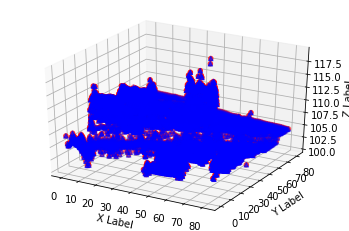

In [ ]:
#première tentative de rendu 3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = df['x']
    ys = df['y']
    zs = df['z']
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()



In [ ]:
np_array = df.to_numpy()
print(np_array)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(np_array)

# Ne fonctionne pas sur google colab
o3d.visualization.draw_geometries([pcd])

[[  0.           0.         107.02999878]
 [  1.           0.         105.15584389]
 [  2.           0.         105.62000275]
 ...
 [ 79.          81.         104.4830902 ]
 [ 80.          81.         104.44999695]
 [ 81.          81.         104.44999695]]


RuntimeError: ignored